In [1]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textcounts
%matplotlib inline

In [2]:
sns.set(font_scale=1.5)

In [3]:
!wget -O pp.txt.gz "http://www.gutenberg.org/cache/epub/1342/pg1342.txt"
!gunzip -f pp.txt.gz

--2017-06-14 12:54:45--  http://www.gutenberg.org/cache/epub/1342/pg1342.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258759 (253K) [text/plain]
Saving to: ‘pp.txt.gz’

pp.txt.gz           100%[===================>] 252.69K   620KB/s    in 0.4s    

2017-06-14 12:54:47 (620 KB/s) - ‘pp.txt.gz’ saved [258759/258759]



In [4]:
!head pp.txt

In [5]:
with open('pp.txt','r') as f:
    s = f.read()
    #s = s.encode('utf-8')
    #s = s.lower().translate(None, string.punctuation)

In [6]:
pp_pars = []
for item in s.split("\n\n"):
    if item != '' or item not in string.punctuation:
        pp_pars.append(item.replace("\n", " "))


In [7]:
pp_pars[10:20]

['Chapter 1',
 ' It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.',
 'However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.',
 '"My dear Mr. Bennet," said his lady to him one day, "have you heard that Netherfield Park is let at last?"',
 'Mr. Bennet replied that he had not.',
 '"But it is," returned she; "for Mrs. Long has just been here, and she told me all about it."',
 'Mr. Bennet made no answer.',
 '"Do you not want to know who has taken it?" cried his wife impatiently.',
 '"_You_ want to tell me, and I have no objection to hearing it."',
 'This was invitation enough.']

## Examples

### Setting patterns in lists and dictionaries

In [8]:
pp_patterns_list_de = ['darcy', 'elizabeth']
pp_patterns_dict_gender = {'feminine':['her', 'she', 'mrs.', 'lady', 'daughter'],
                    'masculine':['his', 'him', 'mr.', 'sir', 'son']
                   }

### Find mentions

In [9]:
de_list = textcounts.find_mentions(pp_pars, ["darcy", "elizabeth"])
print(len(de_list))
de_list[0:5]

758


['"But you forget, mamma," said Elizabeth, "that we shall meet him at the assemblies, and that Mrs. Long promised to introduce him."',
 'Mr. Bingley was good-looking and gentlemanlike; he had a pleasant countenance, and easy, unaffected manners. His sisters were fine women, with an air of decided fashion. His brother-in-law, Mr. Hurst, merely looked the gentleman; but his friend Mr. Darcy soon drew the attention of the room by his fine, tall person, handsome features, noble mien, and the report which was in general circulation within five minutes after his entrance, of his having ten thousand a year. The gentlemen pronounced him to be a fine figure of a man, the ladies declared he was much handsomer than Mr. Bingley, and he was looked at with great admiration for about half the evening, till his manners gave a disgust which turned the tide of his popularity; for he was discovered to be proud; to be above his company, and above being pleased; and not all his large estate in Derbyshire c

In [10]:
de_list = textcounts.find_mentions(pp_pars, "darcy")
print(len(de_list))
de_list[0:5]

347


['Mr. Bingley was good-looking and gentlemanlike; he had a pleasant countenance, and easy, unaffected manners. His sisters were fine women, with an air of decided fashion. His brother-in-law, Mr. Hurst, merely looked the gentleman; but his friend Mr. Darcy soon drew the attention of the room by his fine, tall person, handsome features, noble mien, and the report which was in general circulation within five minutes after his entrance, of his having ten thousand a year. The gentlemen pronounced him to be a fine figure of a man, the ladies declared he was much handsomer than Mr. Bingley, and he was looked at with great admiration for about half the evening, till his manners gave a disgust which turned the tide of his popularity; for he was discovered to be proud; to be above his company, and above being pleased; and not all his large estate in Derbyshire could then save him from having a most forbidding, disagreeable countenance, and being unworthy to be compared with his friend.',
 'Mr. 

In [11]:
textcounts.pattern_counts(pp_pars, "bennet")[10:20]

,bennet count
location,
10,0
11,0
12,0
13,1
14,1
15,0
16,1
17,0
18,0


In [12]:
textcounts.pattern_counts(pp_pars, ["she", "her", "mrs"])[10:20]

,her count,mrs count,she count
location,,,
10,0,0,0
11,0,0,0
12,1,0,0
13,1,0,0
14,0,0,0
15,1,1,2
16,0,0,0
17,0,0,0
18,0,0,0


In [13]:
textcounts.pattern_counts(pp_pars, ["she", "her", "mrs"]).sum(axis=1)[10:20]

location
10    0
11    0
12    1
13    1
14    0
15    4
16    0
17    0
18    0
19    0
dtype: int64

### Find the proportion of all items that match pattern(s)

In [14]:
textcounts.prop_mentions(pp_pars, pp_patterns_list_de)

0.34627683873915027

In [15]:
textcounts.prop_mentions(pp_pars, "darcy")

0.1585198720877113

## Multipattern counts

### Multipattern counts with a list of patterns

In [16]:
darcy_elizabeth_counts_df = textcounts.pattern_counts(pp_pars, pp_patterns_list_de)

In [17]:
darcy_elizabeth_counts_df[100:110]

,darcy count,elizabeth count
location,,
100,0,0
101,0,0
102,0,0
103,0,0
104,0,0
105,0,1
106,0,0
107,0,0
108,6,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1aff6407b8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f1afcef7a58>], dtype=object)

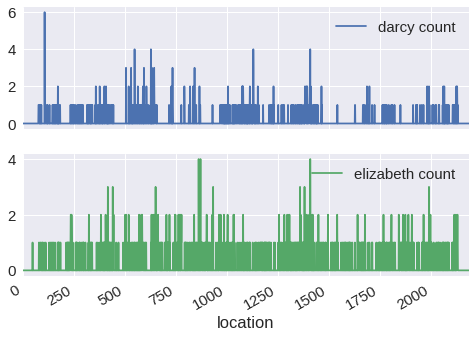

In [18]:
darcy_elizabeth_counts_df.plot(subplots=True)

### Multipattern proportions with a list of patterns

In [19]:
darcy_elizabeth_prop_df = textcounts.pattern_prop(pp_pars, pp_patterns_list_de)

In [20]:
darcy_elizabeth_prop_df[100:110]

,darcy,elizabeth
location,,
100,0,0
101,0,0
102,0,0
103,0,0
104,0,0
105,0,1
106,0,0
107,0,0
108,1,0


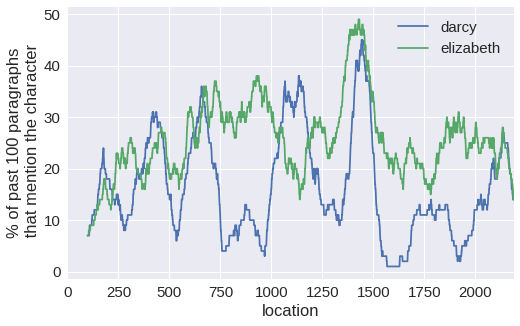

In [21]:
ax = (darcy_elizabeth_prop_df.rolling(window=100).mean() * 100).plot(figsize=[8,5])
ax.set_ylabel("% of past 100 paragraphs\n that mention the character")

### Multipattern counts with a dict of patterns

In [22]:
gender_counts_df = textcounts.pattern_counts(pp_pars, pp_patterns_dict_gender)

In [23]:
gender_counts_df[0:10]

,masculine count,feminine count
location,,
0,0,0
1,2,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,0
7,0,0
8,0,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1afcd48c88>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f1afcd085f8>], dtype=object)

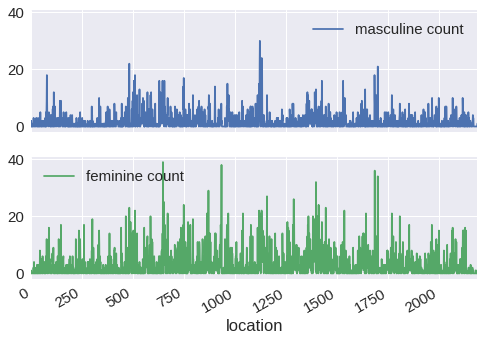

In [24]:
gender_counts_df.plot(subplots=True, sharey=True)

#### Cumulative mentions

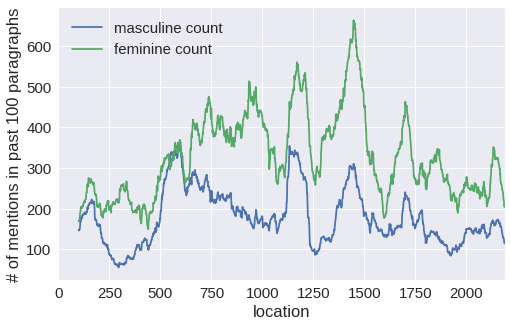

In [25]:
ax = (gender_counts_df.rolling(window=100).sum()).plot(figsize=[8,5])
ax.set_ylabel("# of mentions in past 100 paragraphs")

### Multipattern proportions with a dict of patterns

In [26]:
gender_prop_df = textcounts.pattern_prop(pp_pars, pp_patterns_dict_gender)

In [27]:
gender_prop_df[0:10]

,masculine,feminine
location,,
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,0
7,0,0
8,0,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1afc352b70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f1afc3b3470>], dtype=object)

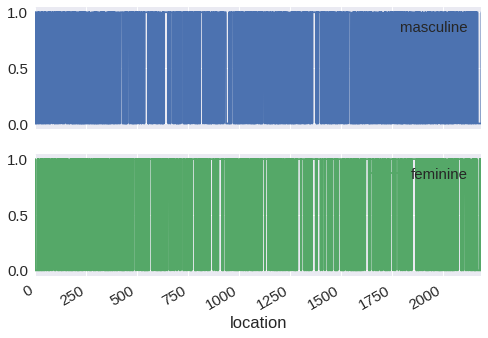

In [28]:
gender_prop_df.plot(subplots=True, sharey=True)

#### Rolling average

(0, 100)

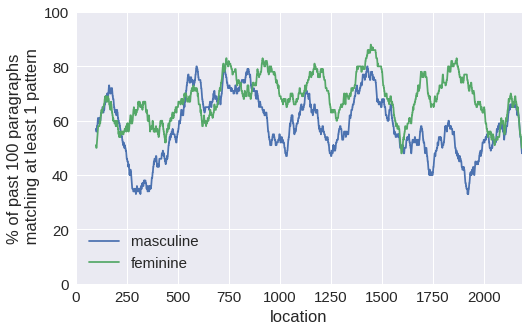

In [29]:
ax = (gender_prop_df.rolling(window=100).mean() * 100).plot(figsize=[8,5])
ax.set_ylabel("% of past 100 paragraphs\n matching at least 1 pattern")
plt.ylim(0,100)